In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly

In [2]:
df = pd.read_csv('Alpha_Motors.csv')

In [8]:
df.head()

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000"
1,1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000"
2,2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000"
3,3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000"
4,4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000"


In [9]:
# Check data types incase there is need for conversion.
print(df.dtypes)

Unnamed: 0               int64
Make                    object
Year of manufacture    float64
Condition               object
Mileage                float64
Engine Size            float64
Fuel                    object
Transmission            object
Price                   object
dtype: object


In [10]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
# Convertion
df['Price'] = df['Price'].replace('[\$,₦]', '', regex=True).astype(float)

In [12]:
# Fill missing values with median because we need the numbers
df['Year of manufacture'].fillna(df['Year of manufacture'].median(), inplace=True)
df['Mileage'].fillna(df['Mileage'].median(), inplace=True)
df['Engine Size'].fillna(df['Engine Size'].median(), inplace=True)


In [13]:
# Convert columns to integers after filling 
df['Year of manufacture'] = df['Year of manufacture'].astype(int)
df['Mileage'] = df['Mileage'].astype(int)
df['Engine Size'] = df['Engine Size'].astype(int)

In [16]:
# Fill missing values in categorical columns with the most frequent value in oder to avoid distorting the dataset
categorical_cols = ['Make', 'Condition', 'Fuel', 'Transmission']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

for col in categorical_cols:
    df[col] = df[col].str.strip().str.lower()

df.to_csv('cleaned_dataset.csv', index=False)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4095 non-null   object 
 1   Year of manufacture  4095 non-null   int32  
 2   Condition            4095 non-null   object 
 3   Mileage              4095 non-null   int32  
 4   Engine Size          4095 non-null   int32  
 5   Fuel                 4095 non-null   object 
 6   Transmission         4095 non-null   object 
 7   Price                4095 non-null   float64
dtypes: float64(1), int32(3), object(4)
memory usage: 208.1+ KB


,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,toyota,2007,nigerian used,166418,2400,petrol,automatic,3120000.0
1,lexus,2008,nigerian used,138024,2500,petrol,automatic,5834000.0
2,mercedes-benz,2008,nigerian used,376807,3000,petrol,automatic,3640000.0
3,lexus,2008,nigerian used,213362,2500,petrol,automatic,3594000.0
4,mercedes-benz,2008,nigerian used,106199,2500,petrol,automatic,8410000.0


In [17]:
# Fix typos just incase
df['Make'] = df['Make'].replace({'tooyota': 'toyota'})

df.to_csv('cleaned_dataset.csv', index=False)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 4095 non-null   object 
 1   Year of manufacture  4095 non-null   int32  
 2   Condition            4095 non-null   object 
 3   Mileage              4095 non-null   int32  
 4   Engine Size          4095 non-null   int32  
 5   Fuel                 4095 non-null   object 
 6   Transmission         4095 non-null   object 
 7   Price                4095 non-null   float64
dtypes: float64(1), int32(3), object(4)
memory usage: 208.1+ KB


,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price
0,toyota,2007,nigerian used,166418,2400,petrol,automatic,3120000.0
1,lexus,2008,nigerian used,138024,2500,petrol,automatic,5834000.0
2,mercedes-benz,2008,nigerian used,376807,3000,petrol,automatic,3640000.0
3,lexus,2008,nigerian used,213362,2500,petrol,automatic,3594000.0
4,mercedes-benz,2008,nigerian used,106199,2500,petrol,automatic,8410000.0


In [18]:
df.describe()

,Year of manufacture,Mileage,Engine Size,Price
count,4095.000000,4.095000e+03,4095.000000,4.095000e+03
mean,2007.910379,1.821664e+05,3178.270085,4.271288e+06
std,4.041435,2.091046e+05,7201.910280,4.900064e+06
min,1992.000000,1.000000e+00,3.000000,4.580000e+05
25%,2005.000000,1.025985e+05,2400.000000,1.872000e+06
50%,2008.000000,1.613520e+05,2500.000000,2.940000e+06
75%,2010.000000,2.306370e+05,3500.000000,4.725000e+06
max,2021.000000,9.976050e+06,371000.000000,5.880000e+07


In [19]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 879


In [20]:
df = df.drop_duplicates()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3216 entries, 0 to 4094
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 3216 non-null   object 
 1   Year of manufacture  3216 non-null   int32  
 2   Condition            3216 non-null   object 
 3   Mileage              3216 non-null   int32  
 4   Engine Size          3216 non-null   int32  
 5   Fuel                 3216 non-null   object 
 6   Transmission         3216 non-null   object 
 7   Price                3216 non-null   float64
dtypes: float64(1), int32(3), object(4)
memory usage: 188.4+ KB


In [22]:
for col in ['Make', 'Condition', 'Fuel', 'Transmission', 'Build']:
    print(f"Unique values in {col}:\n", df[col].value_counts(), "\n")

Unique values in Make:
 Make
toyota           1151
lexus             371
mercedes-benz     346
honda             320
ford              152
hyundai           142
nissan            141
kia                73
land rover         58
volkswagen         51
bmw                50
mazda              50
acura              43
chevrolet          33
infiniti           33
peugeot            30
mitsubishi         19
pontiac            17
volvo              16
suzuki             13
dodge              12
audi               11
jaguar             10
opel                9
jeep                9
porsche             7
chrysler            6
renault             6
fiat                5
gmc                 4
lincoln             4
skoda               3
changan             3
jac                 2
mini                2
bentley             1
citroen             1
rover               1
seat                1
ssangyong           1
mg                  1
hummer              1
isuzu               1
cadillac            1
bui

KeyError: 'Build'

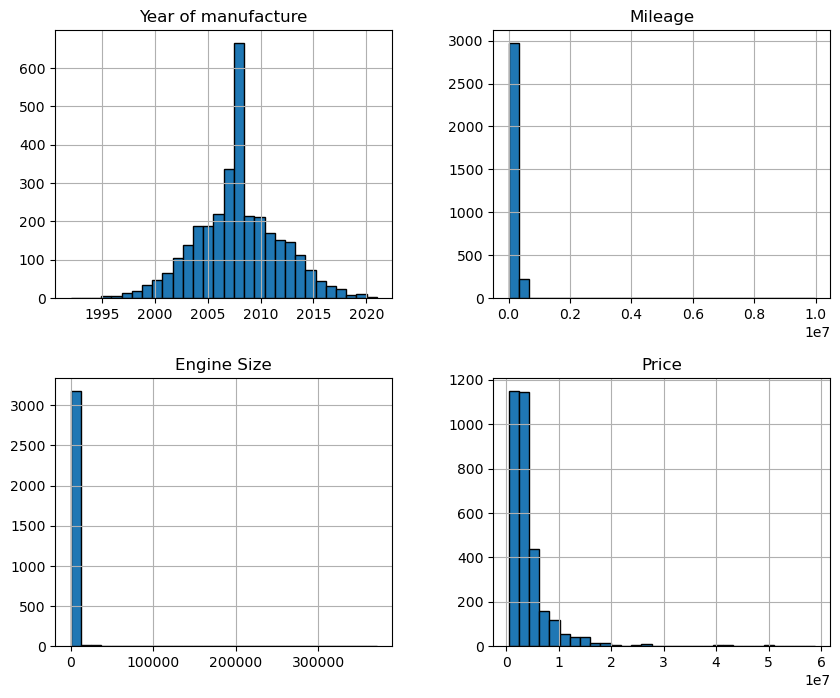

In [23]:
df.hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.show()

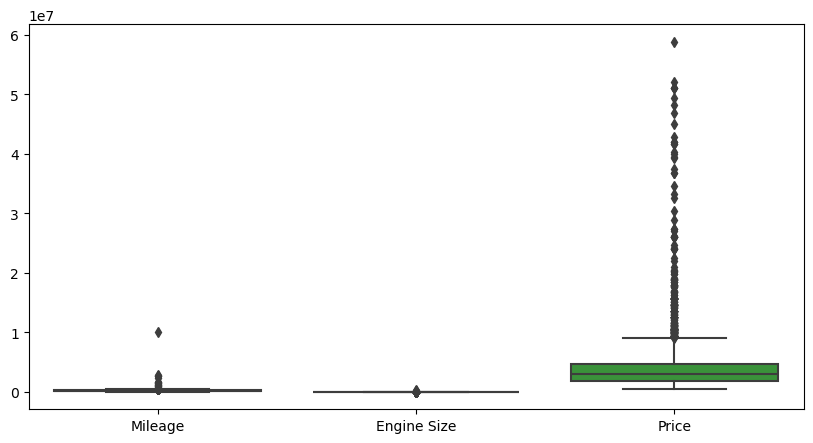

In [24]:
# Boxplot to detect outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Mileage', 'Engine Size', 'Price']])
plt.show()

In [25]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: 'toyota'

<Figure size 800x600 with 0 Axes>

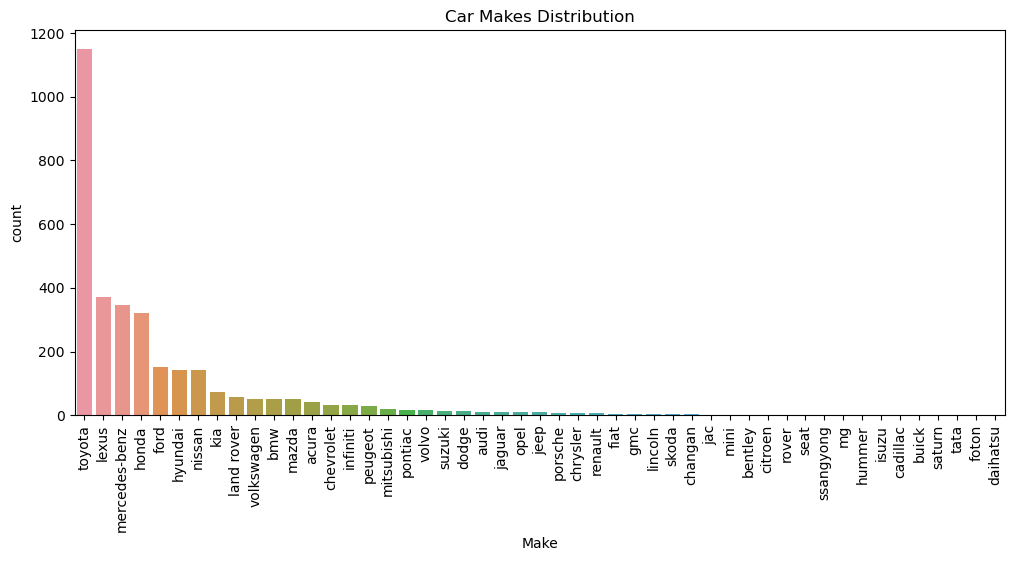

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Make'], order=df['Make'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Car Makes Distribution")
plt.show()

In [28]:
avg_price = df.groupby(['Make', 'Year of manufacture'])['Price'].mean().reset_index()

avg_price = avg_price.sort_values(by=['Make', 'Year of manufacture'])
print(avg_price)

      Make  Year of manufacture         Price
0    acura                 2001  1.687500e+06
1    acura                 2002  1.361250e+06
2    acura                 2003  7.350000e+05
3    acura                 2004  1.981200e+06
4    acura                 2005  1.656000e+06
..     ...                  ...           ...
390  volvo                 2004  2.257500e+06
391  volvo                 2005  1.463333e+06
392  volvo                 2006  2.625000e+06
393  volvo                 2007  2.835000e+06
394  volvo                 2008  3.150143e+06

[395 rows x 3 columns]


In [29]:
top_5_cars = df.groupby('Make')['Price'].mean().reset_index()
top_5_cars = top_5_cars.sort_values(by='Price', ascending=False).head(5)

print("Top 5 Car Makes by Average Selling Price:")
print(top_5_cars)

Top 5 Car Makes by Average Selling Price:
          Make         Price
45        tata  1.785000e+07
2      bentley  1.689500e+07
6      changan  1.292500e+07
39       rover  1.018500e+07
25  land rover  9.551121e+06


In [30]:
# Do automatic cars have high price value than manual cars
transmission_price = df.groupby('Transmission')['Price'].mean().reset_index()

print("Average Price of Automatic Manual CVT AMT Cars:")
print(transmission_price)

Average Price of Automatic Manual CVT AMT Cars:
  Transmission         Price
0          amt  3.113250e+06
1    automatic  4.386215e+06
2          cvt  4.586842e+06
3       manual  2.489056e+06


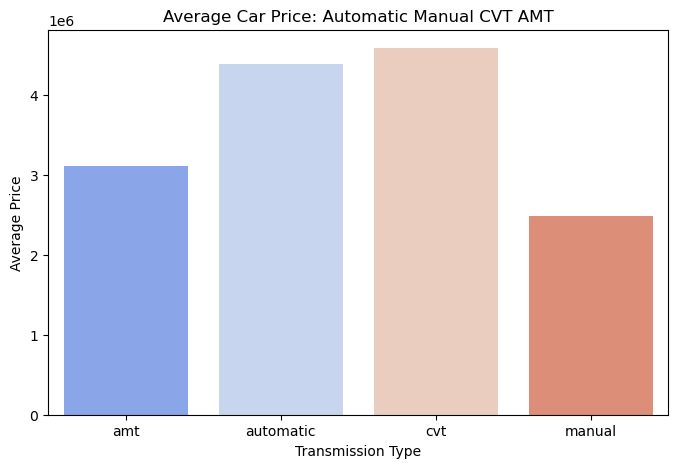

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(x=transmission_price['Transmission'], y=transmission_price['Price'], palette="coolwarm")
plt.title("Average Car Price: Automatic Manual CVT AMT")
plt.xlabel("Transmission Type")
plt.ylabel("Average Price")
plt.show()

In [32]:
# is ther a  correlation between Mileage and Price
correlation = df[['Mileage', 'Price']].corr()

print("Correlation between Mileage and Price:")
print(correlation)


Correlation between Mileage and Price:
          Mileage     Price
Mileage  1.000000 -0.148775
Price   -0.148775  1.000000


In [33]:
# depreciation rate
brand_depreciation = df.groupby(['Make', 'Year of manufacture'])['Price'].mean().reset_index()

brand_depreciation = brand_depreciation.sort_values(by=['Make', 'Year of manufacture'])
print(brand_depreciation)


      Make  Year of manufacture         Price
0    acura                 2001  1.687500e+06
1    acura                 2002  1.361250e+06
2    acura                 2003  7.350000e+05
3    acura                 2004  1.981200e+06
4    acura                 2005  1.656000e+06
..     ...                  ...           ...
390  volvo                 2004  2.257500e+06
391  volvo                 2005  1.463333e+06
392  volvo                 2006  2.625000e+06
393  volvo                 2007  2.835000e+06
394  volvo                 2008  3.150143e+06

[395 rows x 3 columns]


In [34]:
brand_depreciation['Depreciation'] = brand_depreciation.groupby('Make')['Price'].pct_change() * 100
print(brand_depreciation)


      Make  Year of manufacture         Price  Depreciation
0    acura                 2001  1.687500e+06           NaN
1    acura                 2002  1.361250e+06    -19.333333
2    acura                 2003  7.350000e+05    -46.005510
3    acura                 2004  1.981200e+06    169.551020
4    acura                 2005  1.656000e+06    -16.414294
..     ...                  ...           ...           ...
390  volvo                 2004  2.257500e+06      7.500000
391  volvo                 2005  1.463333e+06    -35.179033
392  volvo                 2006  2.625000e+06     79.384966
393  volvo                 2007  2.835000e+06      8.000000
394  volvo                 2008  3.150143e+06     11.116150

[395 rows x 4 columns]


C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tebrick_KING\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


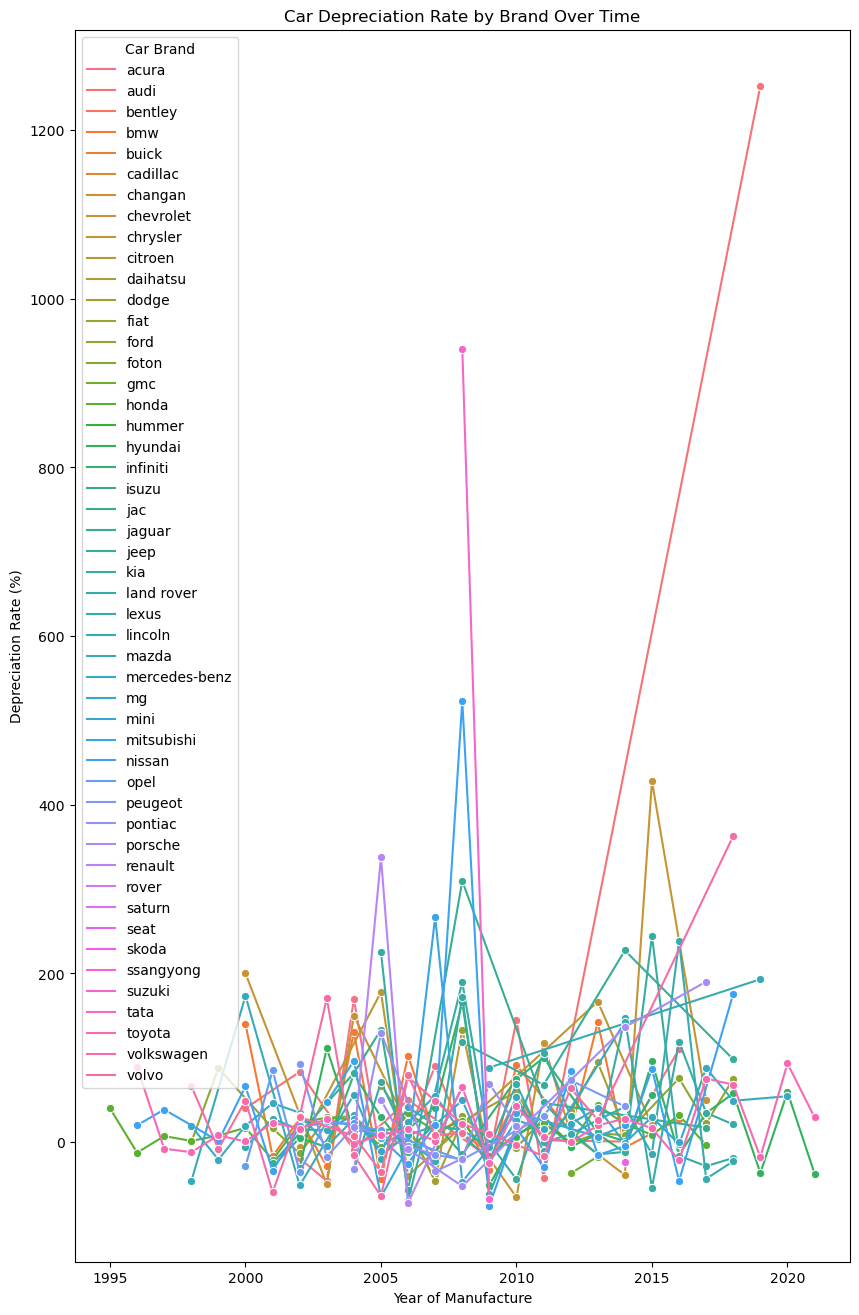

In [33]:
plt.figure(figsize=(10, 16))

# Plot depreciation trends for different brands
sns.lineplot(data=brand_depreciation, x='Year of manufacture', y='Depreciation', hue='Make', marker="o")

plt.title("Car Depreciation Rate by Brand Over Time")
plt.xlabel("Year of Manufacture")
plt.ylabel("Depreciation Rate (%)")
plt.legend(title="Car Brand")
plt.show()

In [35]:
# how does condition affect price
condition_price = df.groupby('Condition')['Price'].mean().reset_index()

print("Average Price Based on Condition:")
print(condition_price)


Average Price Based on Condition:
       Condition         Price
0      brand new  2.456800e+07
1   foreign used  6.011426e+06
2  nigerian used  3.603251e+06


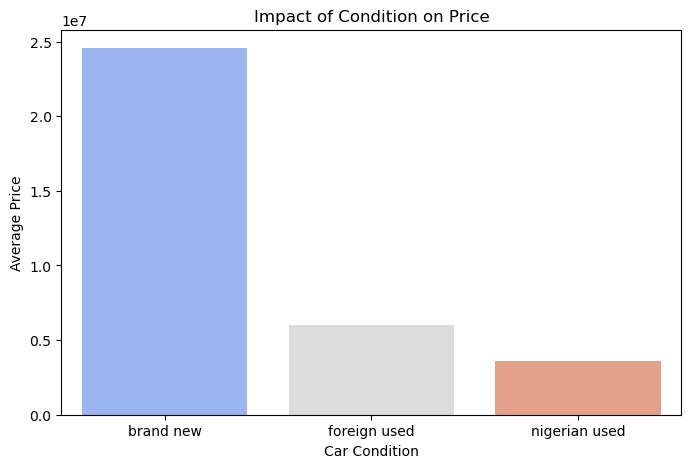

In [36]:
plt.figure(figsize=(8, 5))
sns.barplot(x=condition_price['Condition'], y=condition_price['Price'], palette="coolwarm")
plt.title("Impact of Condition on Price")
plt.xlabel("Car Condition")
plt.ylabel("Average Price")
plt.show()

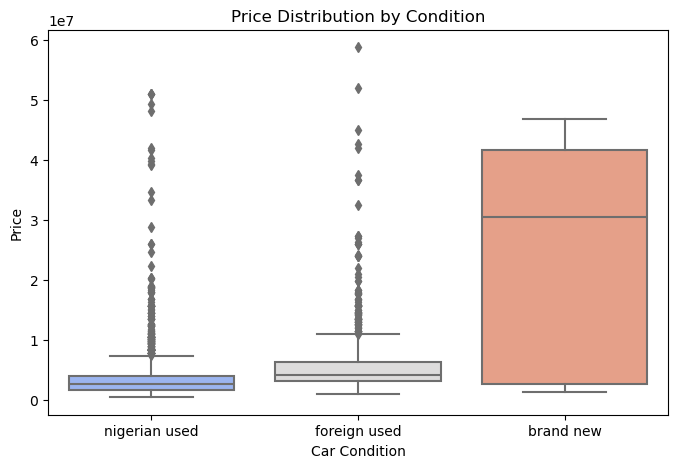

In [37]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Condition'], y=df['Price'], palette="coolwarm")
plt.title("Price Distribution by Condition")
plt.xlabel("Car Condition")
plt.ylabel("Price")
plt.show()


In [38]:
# let us compare across different brands
brand_condition_price = df.groupby(['Make', 'Condition'])['Price'].mean().reset_index()

print("Average Price Based on Condition and Brand:")
print(brand_condition_price)


Average Price Based on Condition and Brand:
          Make      Condition         Price
0        acura   foreign used  4.919556e+06
1        acura  nigerian used  3.217703e+06
2         audi   foreign used  3.402000e+06
3         audi  nigerian used  1.013375e+07
4      bentley  nigerian used  1.689500e+07
..         ...            ...           ...
75      toyota  nigerian used  3.245294e+06
76  volkswagen   foreign used  6.386250e+06
77  volkswagen  nigerian used  1.813402e+06
78       volvo   foreign used  2.356286e+06
79       volvo  nigerian used  2.626556e+06

[80 rows x 3 columns]


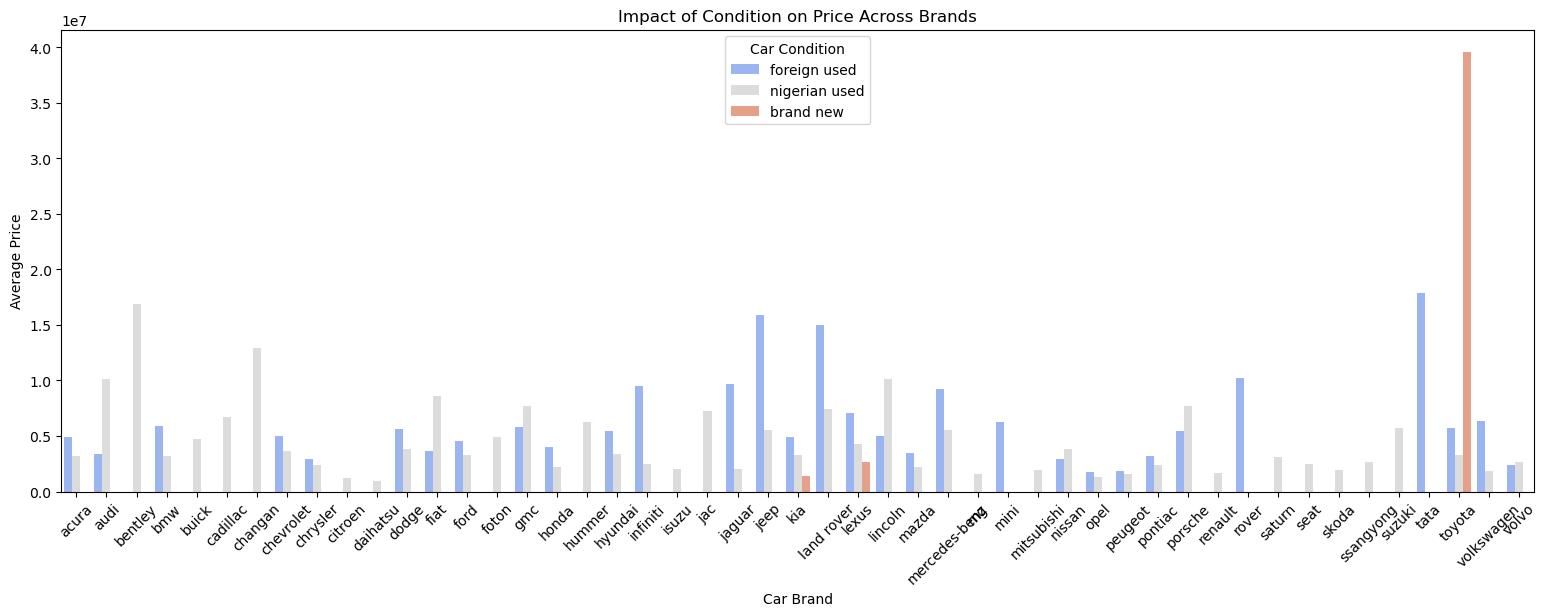

In [40]:
plt.figure(figsize=(19, 6))
sns.barplot(data=brand_condition_price, x='Make', y='Price', hue='Condition', palette="coolwarm")

plt.xticks(rotation=45) 
plt.title("Impact of Condition on Price Across Brands")
plt.xlabel("Car Brand")
plt.ylabel("Average Price")
plt.legend(title="Car Condition")
plt.show()

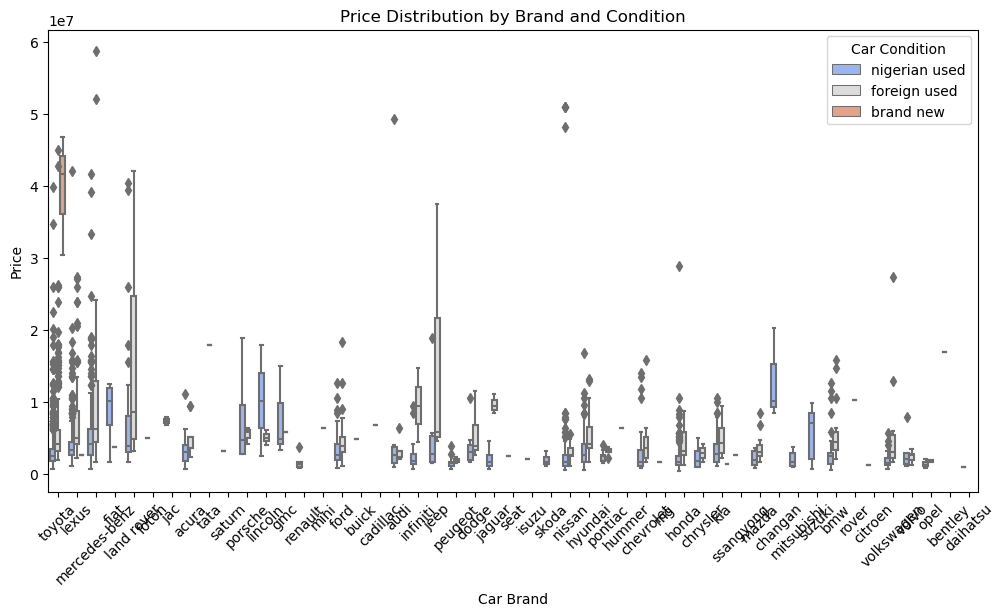

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Make', y='Price', hue='Condition', palette="coolwarm")

plt.xticks(rotation=45)  # Rotate labels for clarity
plt.title("Price Distribution by Brand and Condition")
plt.xlabel("Car Brand")
plt.ylabel("Price")
plt.legend(title="Car Condition")
plt.show()


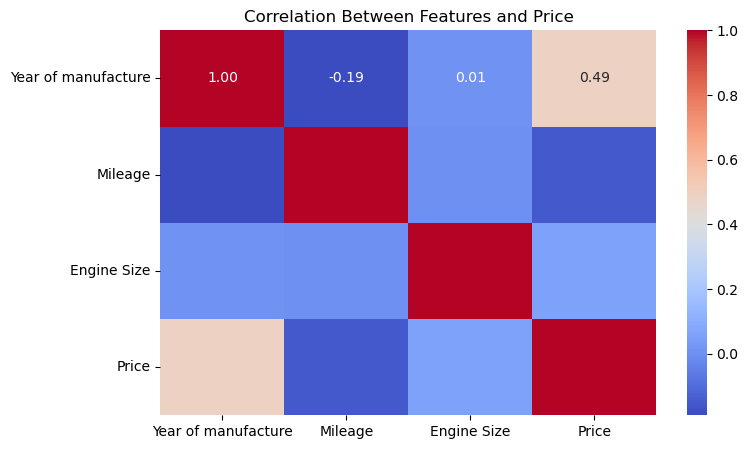

In [42]:
# we are to check which feature has the most influence on price of car
numeric_features = ['Year of manufacture', 'Mileage', 'Engine Size', 'Price']
correlation_matrix = df[numeric_features].corr()

# Visualize the correlation 
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features and Price")
plt.show()

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode
df_encoded = df.copy()
label_encoders = {}
for col in ['Make', 'Condition', 'Fuel', 'Transmission']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Select features and target variable
features = ['Year of manufacture', 'Mileage', 'Engine Size', 'Make', 'Condition', 'Fuel', 'Transmission']
X = df_encoded[features]
y = df_encoded['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by="Importance", ascending=False)

print("Feature Importance Ranking:")
print(feature_importance_df)


Feature Importance Ranking:
               Feature  Importance
0  Year of manufacture    0.394359
1              Mileage    0.289826
2          Engine Size    0.168174
3                 Make    0.101783
4            Condition    0.038384
6         Transmission    0.005958
5                 Fuel    0.001515


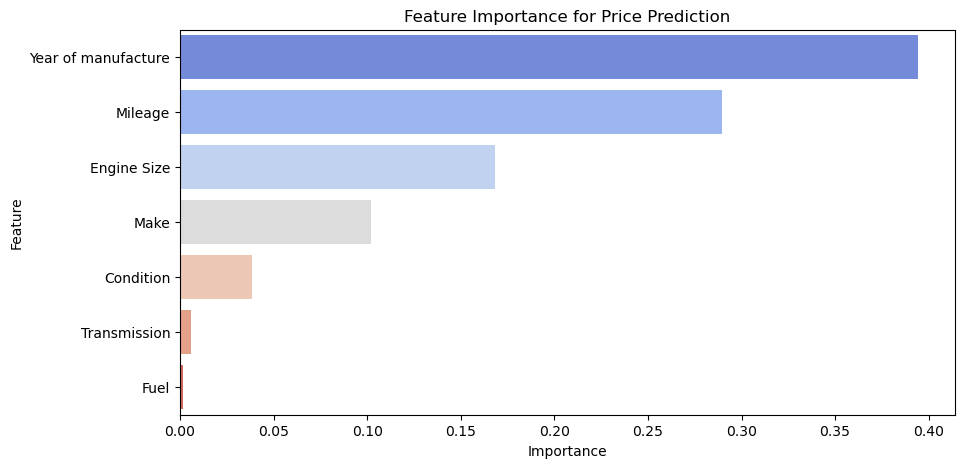

In [44]:
plt.figure(figsize=(10, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette="coolwarm")
plt.title("Feature Importance for Price Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

pricing model

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

# irrelevant columns have been dropped,price have been converted to numerical value and missing values have also been handled

# Encode categorical variables 
label_encoders = {}
for col in ['Make', 'Condition', 'Fuel', 'Transmission']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# features and target variable are being defined
features = ['Year of manufacture', 'Mileage', 'Engine Size', 'Make', 'Condition', 'Fuel', 'Transmission']
X = df[features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
# We'll use Random Forest Regressor to predict car prices
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [49]:
# We’ll check Mean Absolute Error (MAE) and R² Score to see how well the model predicts prices.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ₦{mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: ₦1551221.83
R² Score: 0.59


the score is 59% which is not good enough,we can try to improve model accuracy

In [50]:
from datetime import datetime
current_year = datetime.now().year
df['Car Age'] = current_year - df['Year of manufacture']
# instead of using year of manufacturing,we will use car age as a matrix going forward
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Car Age
0,46,2007,2,166418,2400,3,1,3120000.0,18
1,26,2008,2,138024,2500,3,1,5834000.0,17
2,29,2008,2,376807,3000,3,1,3640000.0,17
3,26,2008,2,213362,2500,3,1,3594000.0,17
4,29,2008,2,106199,2500,3,1,8410000.0,17


In [51]:
df['Mileage'] = df['Mileage'].replace(0, 1)
df['Price per KM'] = df['Price'] / df['Mileage']
# add price per milage 
df.head()

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Car Age,Price per KM
0,46,2007,2,166418,2400,3,1,3120000.0,18,18.747972
1,26,2008,2,138024,2500,3,1,5834000.0,17,42.268011
2,29,2008,2,376807,3000,3,1,3640000.0,17,9.660118
3,26,2008,2,213362,2500,3,1,3594000.0,17,16.844612
4,29,2008,2,106199,2500,3,1,8410000.0,17,79.190953


In [52]:
brand_value_retention = df.groupby('Make')['Price per KM'].mean().sort_values(ascending=False)
top_5_brands = brand_value_retention.head(5)
# Display the result
print(top_5_brands)

Make
44    351388.289055
12     74660.434495
0      17950.040645
33     13513.760554
29      9127.323570
Name: Price per KM, dtype: float64


In [59]:
df[df['Make'] == 33]

,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Car Age,Price per KM
1017,33,2007,2,173224,3500,3,1,1518750.0,18,8.767550
1232,33,2008,1,113279,3500,3,1,3675000.0,17,32.442024
1566,33,2013,2,73259,1800,3,1,2520000.0,12,34.398504
1677,33,2008,2,121104,5600,3,1,3675000.0,17,30.345818
1816,33,2014,2,78271,2500,3,1,3150000.0,11,40.244791
...,...,...,...,...,...,...,...,...,...,...
3986,33,2005,2,113950,3000,3,1,1125000.0,20,9.872751
4063,33,2005,2,254848,1500,3,3,843750.0,20,3.310797
4071,33,1997,2,223390,1600,3,3,731250.0,28,3.273423
4074,33,2014,2,221833,1800,3,2,2812500.0,11,12.678456


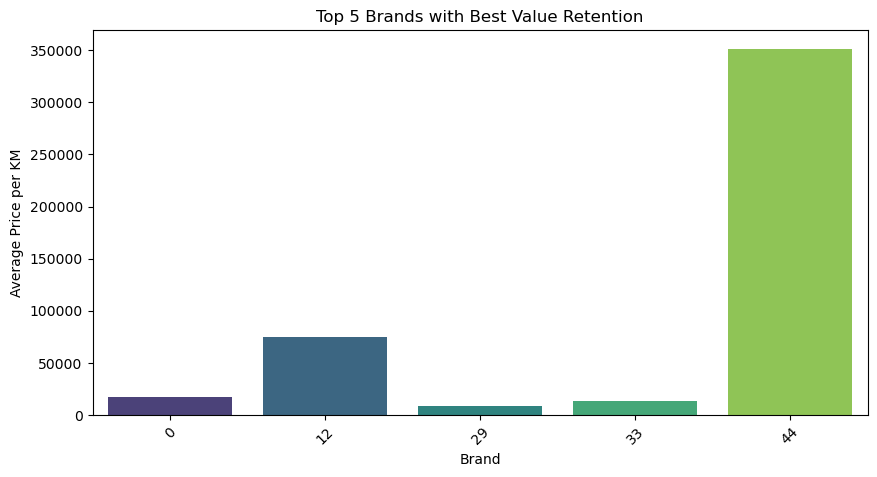

In [60]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette="viridis")

plt.xlabel("Brand")
plt.ylabel("Average Price per KM")
plt.title("Top 5 Brands with Best Value Retention")
plt.xticks(rotation=45)

plt.show()

using gradient boosting for a more accurate pricing model

In [62]:
!pip install xgboost

In [ ]:
import xgboost as xgb
df = pd.get_dummies(df, columns=['Make', 'Condition', 'Fuel', 'Transmission'], drop_first=True)

X = df.drop(columns=['Price'])  
y = df['Price']                 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: ₦{mae:,.2f}")
print(f"R² Score: {r2:.2f}")

In [65]:
print(f"Mean Absolute Error: ₦{mae:,.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: ₦308,283.94
R² Score: 0.94


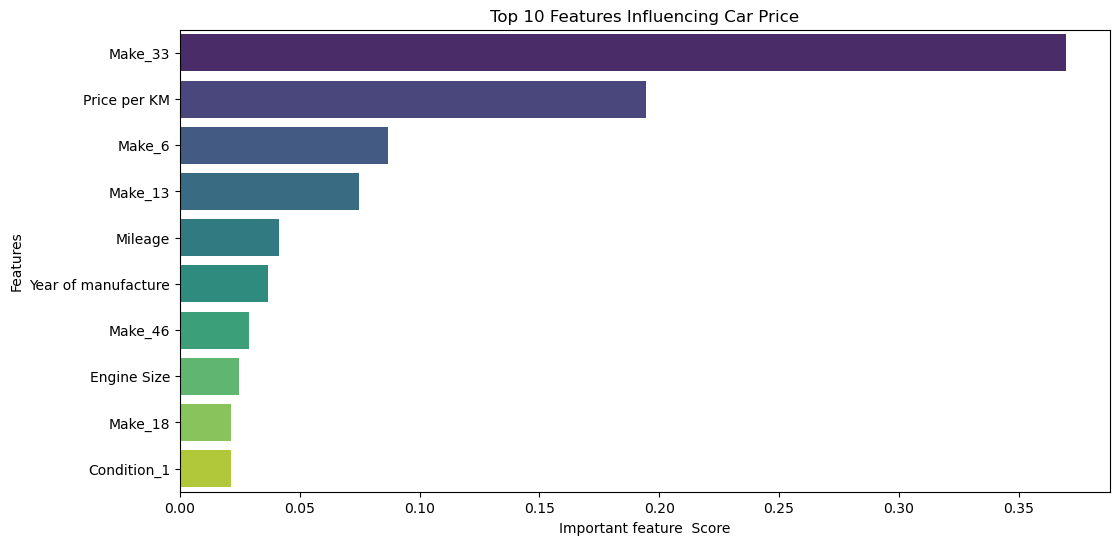

In [66]:
feature_importance = xgb_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

plt.figure(figsize=(12, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="viridis")

plt.xlabel("Important feature  Score")
plt.ylabel("Features")
plt.title("Top 10 Features Influencing Car Price")
plt.show()

In [67]:
# Keep only the top 10 important features
top_features = importance_df['Feature'].tolist()
X_selected = df[top_features]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [68]:
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_grid = {
    'n_estimators': [100, 300, 500],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [3, 5, 7],  
    'subsample': [0.8, 1],  
}
# check documentation
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}


In [69]:
best_params = grid_search.best_params_
#retrain
xgb_tuned = xgb.XGBRegressor(**best_params, random_state=42)
xgb_tuned.fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Fine-Tuned Model - Mean Absolute Error: ${mae:,.2f}")
print(f"Fine-Tuned Model - R² Score: {r2:.2f}")


Fine-Tuned Model - Mean Absolute Error: $304,295.09
Fine-Tuned Model - R² Score: 0.93


In [ ]:
import joblib
joblib.dump(model, "car_price_model.pkl")

print("Model saved successfully!")